# Handcrafting a text-based game with TextWorld
This tutorial shows how to make a custom text-based game using the TextWorld's API.

## `GameMaker`
Let's make a game consisting of two rooms and where the goal is to place an object from the player's inventory inside a container located in the other room.

In [1]:
import textworld
from textworld import GameMaker

# Make the generation process reproducible.
from textworld import g_rng  # Global random generator.
g_rng.set_seed(20180916)

# GameMaker object for handcrafting text-based games.
M = GameMaker()

Documentation about the `GameMaker` API can be found at

https://textworld-docs.azurewebsites.net/textworld.generator.html#textworld.generator.maker.GameMaker

#### First, define the layout of the world.

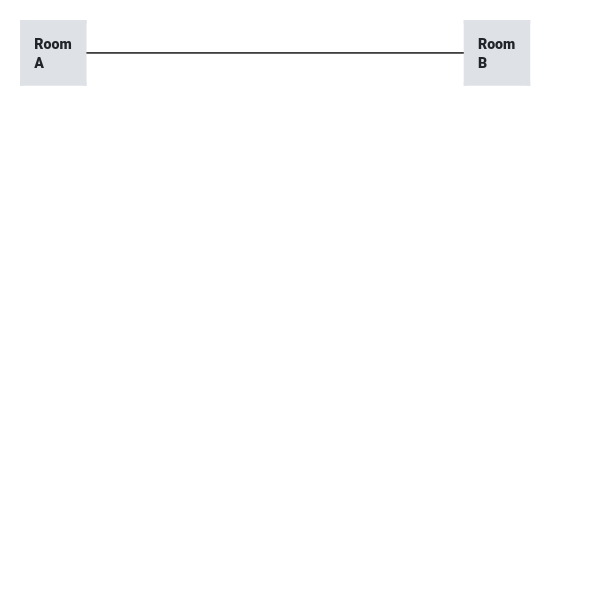

In [2]:
roomA = M.new_room("Room A")
roomB = M.new_room("Room B")
corridor = M.connect(roomA.east, roomB.west)
M.render()

#### Place the player somewhere.

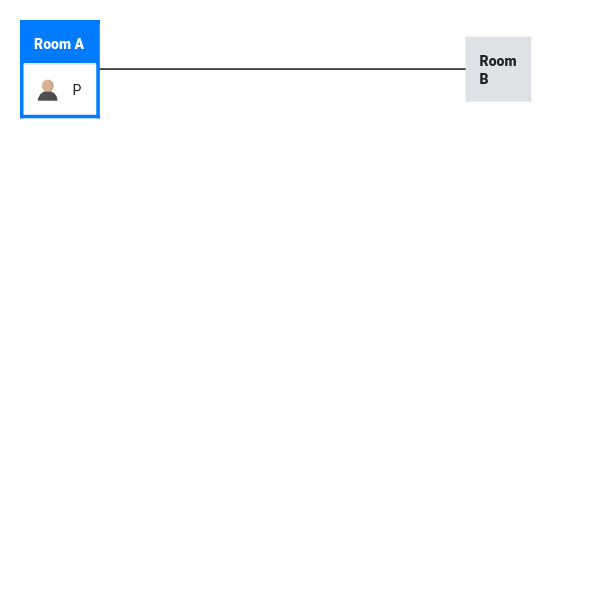

In [3]:
M.set_player(roomA)
M.render()

#### Add two objects to Room A.

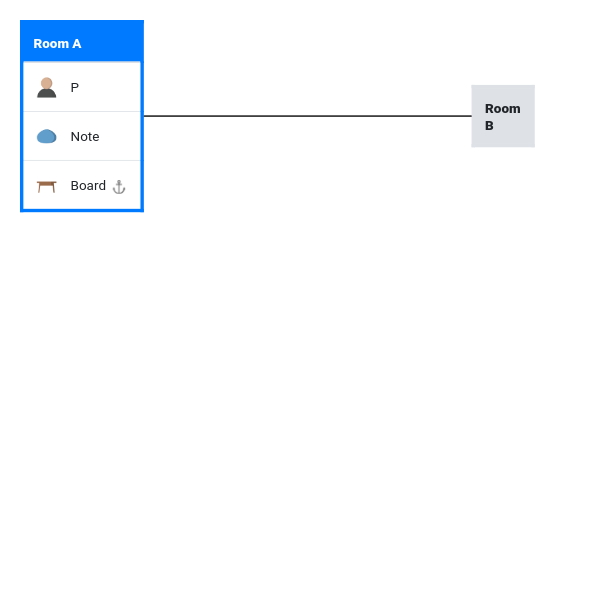

In [4]:
note = M.new(type='o', name="note")  # Provide the type and the name of the object.
note.desc = "Bravo! You can read."  # Text to display when issuing command "examine note". 
supporter = M.new(type='s')  # When not provided, names are automatically generated.
roomA.add(supporter)  # Supporters are fixed in place.
roomA.add(note)  # When added directly to a room, portable objects are put on the floor.
M.render()

##### Supported types of objects

type | name | description
--------|-----|------------
'r' | room | can contain objects, can be connected with other rooms
'd' | door | (un)lockable, openable/closable
'c' | container | can hold objects, (un)lockable, openable/closable
's' | supporter | can hold objects
'o' | portable object | can be carried by the player
'k' | key | subtype of portable object, match a door or container's lock
'f' | food | subtype of portable object, can be eaten if edible
'oven' | oven | subtype of container, provide a heat source to cook food item
'stove' | stove | subtype of supporter, provide a heat source to cook food item

#### Let's add a locked door between the two rooms.

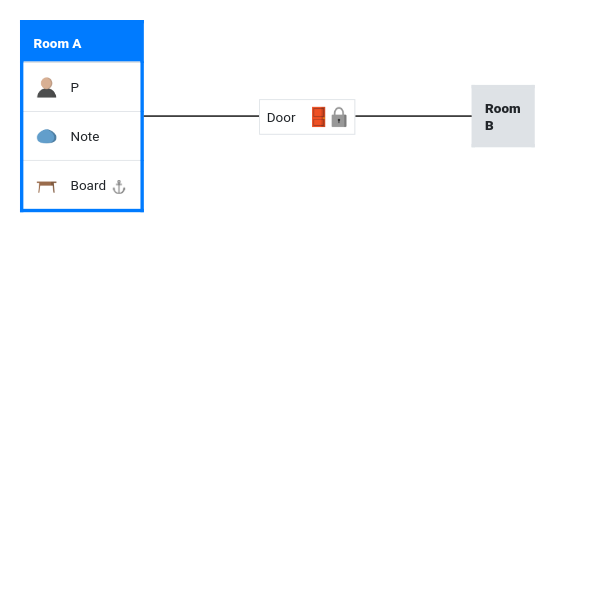

In [5]:
door = M.new_door(corridor, name="door")  # Door and room have their own "new" method, no need to provide the type.
M.add_fact("locked", door)  # Add a fact about the door, i.e. it is locked.
M.render()

##### Supported types of facts

 fact/predicate | description
----------------|------------
__match__(key, container/door) | The `key` matches the `container/door`'s lock.
__open__(container/door) | The `container/door` is open.
__closed__(container/door) | The `container/door` is closed.
__locked__(container/door) | The `container/door` is locked.
__edible__(food) | The `food` is edible, otherwise needs to be cooked first.

#### Create a key object that be used to unlock the door and place on the supporter object.

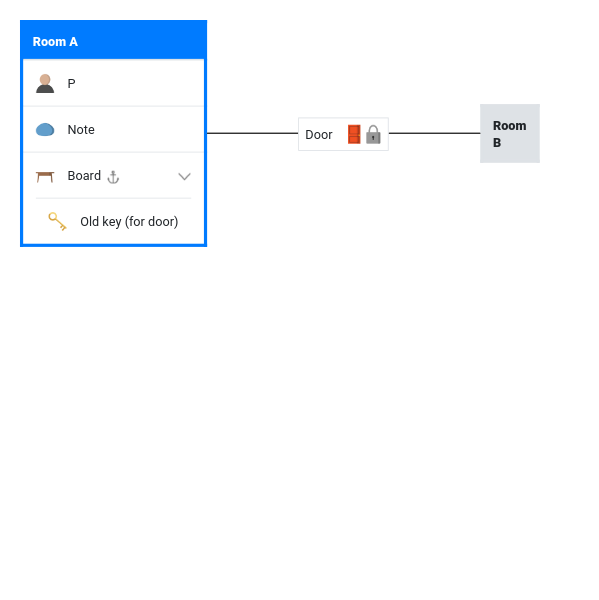

In [6]:
key = M.new(type="k", name="old key")  # Create a 'k' (i.e. key) object. 
M.add_fact("match", key, door)  # Tell the game 'old key' is matching the 'door''s lock
supporter.add(key)  # Add the 'old key' on the supporter.
M.render()

#### Create the object carried by the player and the container (initially closed).

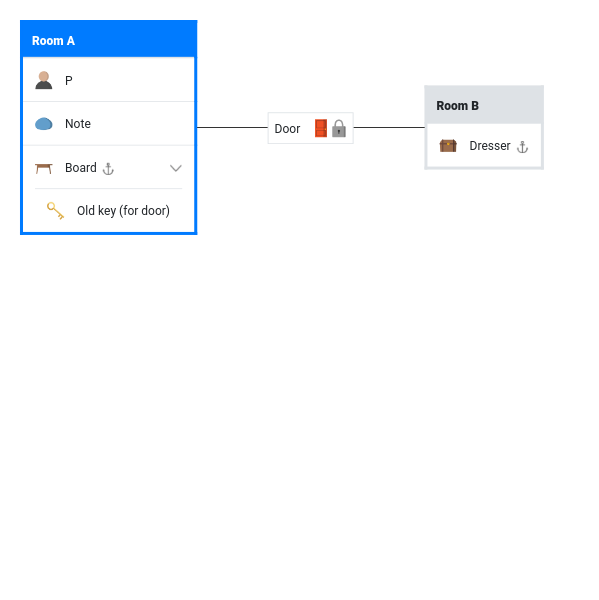

In [7]:
obj = M.new(type='o')  # New portable object with a randomly generated name.
M.inventory.add(obj)  # Add the object to the player's inventory.

container = M.new(type='c')  # Creating a container with a randomly generated name
M.add_fact("closed", container)  # Set the state of the container to 'closed'.
roomB.add(container)  # Place the container in Room B

M.render()

#### Finally, record the quest.
Type all commands you would like to include in the quest given this game. To end recording, either input `quit` or interrupt the kernel (the stop button above).

In [8]:
quest = M.record_quest()






-= Room A =-
You arrive in a Room A. An usual one.

You can make out a board. On the board you can make out an old key.

There is a closed door leading east.

There is a note on the floor.

Available actions: ['drop fly larva', 'inventory', 'look', 'put fly larva on board', 'take note', 'take old key from board']

> take old key from board
You take the old key from the board.

Available actions: ['drop fly larva', 'drop old key', 'inventory', 'look', 'put fly larva on board', 'put old key on board', 'take note', 'unlock door with old key']

> unlock door with old key
You unlock door.

Available actions: ['drop fly larva', 'drop old key', 'inventory', 'lock door with old key', 'look', 'open door', 'put fly larva on board', 'put old key on board', 'take note']

> open door
You open door.

Available actions: ['close door', 'drop fly larva', 'drop old key', 'go east', 'inventory', 'look', 'put fly larva on board', 'put old key on board', 'take note']

> go east

-= Room B =-
You find 

In [9]:
print(" > ".join(quest.commands))
print("\n" + quest.desc)

take old key from board > unlock door with old key > open door > go east > open dresser > insert fly larva into dresser

Get ready to pick stuff up and put it in places, because you've just entered TextWorld! First off, if it's not too much trouble, I need you to recover the old key from the board inside the Room A. Then, Insert the old key into the door in the Room A's lock to unlock it. And then, ensure that the door within the Room A is open. And then, go east. Okay, and then, ensure that the dresser in the Room B is open. Then, insert the fly larva inside the dresser within the Room B. Once that's all handled, you can stop!


### Trying out the game
At any point, we can easily test the game we are currently building (if it can compile).

In [11]:
M.test()




Hey, thanks for coming over to the TextWorld today, there is something I need
you to do for me. First of all, you could, like, retrieve the old key from the
board in the Room A. Then, unlock the door with the old key. And then, assure
that the door within the Room A is ajar. After that, make an attempt to take a
trip east. And then, doublecheck that the dresser is wide open. Then, insert the
fly larva into the dresser within the Room B. That's it!

-= Room A =-
You arrive in a Room A. An ordinary kind of place.

You can make out a board. You see an old key on the board.

There is a closed door leading east.

There is a note on the floor.

Available actions: ['drop fly larva', 'inventory', 'look', 'put fly larva on board', 'take note', 'take old key from board']

> take old key from board
You take the old key from the board.

Available actions: ['drop fly larva', 'drop old key', 'inventory', 'look', 'put fly larva on board', 'put old key on board', 'take note', 'unlock door with old 

### Randomly select a quest

lock Canadian chest with Canadian key
close drawer
drop nest of puppies
put salad on table
open drawer > insert fly larva into drawer
drop book
put fly larva on bench
insert fly larva into basket
take peanut from bench > put peanut on board
take mop > put mop on board

You are now playing a fast paced round of TextWorld! Here is your task for today. First off, pick-up the mop from the floor of the Room A. Then, place the mop on the board. Once that's all handled, you can stop!


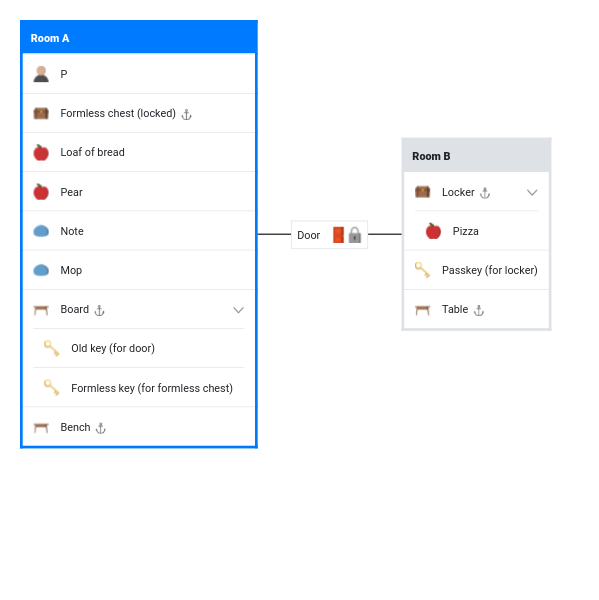

In [10]:
import copy
for i in range(10):
    M2 = copy.deepcopy(M)  # Work on a copy. 
    M2.add_distractors(10)# Add 10 random objects scattered throughout the world.
    quest = M2.new_quest(max_length=2)
    print(" > ".join(quest.commands))

print("\n" + quest.desc)
M2.render()

## Handcrafting your game

In [ ]:
import textworld
from textworld import GameMaker

# Make the generation process reproducible.
from textworld import g_rng  # Global random generator.
g_rng.set_seed(20180329)

# GameMaker object for handcrafting text-based games.
M = GameMaker()

# ... build your game here.

# Uncomment the following lines to record a quest.
# quest = M.record_quest()
# print(" > ".join(quest.commands))
# print("\n" + quest.desc)
M.test()

## Common Errors
- `FailedConstraintsError`: One the constraints has failed. You need to resolve the issue before being able to compile the game. The most common issues:
    - Two objects cannot have the exact same name. Names can be composed of multiple words.
    - A same objects was added twice to a container, supporter, room or inventory.
- `ValueError: Could not determine status '' of container/door ...`: You have to provide the status (a fact) of the door/container, i.e. 'open', 'closed' or 'locked'.